In [ ]:
# install tensorflow
import tensorflow as tf

# notebook for classifying the fashion MNIST dataset using convolutional neural network

this preforms image classification (10 classes), and builds the CNN using Keras Functional API

In [ ]:
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
from keras.api._v2.keras.datasets import fashion_mnist
# load in the data, included in tf 
fahsion_mnist = tf.keras.datasets.fashion_mnist

# load data reutrns two tuples
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# scale the data, as fashion mnist is grayscale 
x_train, x_test = x_train/255., x_test/255.
print('x_train.shape = ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)


In [ ]:
# note train and test are given as N x 28 x 28, so only contain 2D information (H x W)
# this is fine for ANN, but for CNN, we need 3D for convolution layers (H x W x C (color))
# because these are grayscale images, we'll set C = 1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# deduce number of classes (K), or the number of unique values in y_train 
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [ ]:
# now to build the model using keras functional API 
# follow the pattern of increasing the number of feature maps in the conv layers
i = Input(shape=x_train[0].shape)
x = Conv2D(32 , (3,3), strides=2, activation='relu')(i) 
x = Conv2D(64 , (3,3), strides=2, activation='relu')(x) 
x = Conv2D(128, (3,3), strides=2, activation='relu')(x) 
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# compile and fit the model
# this takes some time, so make sure to use the GPU for this
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 5ms/step - loss: 0.5255 - accuracy: 0.8073 - val_loss: 0.4050 - val_accuracy: 0.8506
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3625 - accuracy: 0.8632 - val_loss: 0.3407 - val_accuracy: 0.8753
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3127 - accuracy: 0.8823 - val_loss: 0.3319 - val_accuracy: 0.8806
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2812 - accuracy: 0.8932 - val_loss: 0.3146 - val_accuracy: 0.8842
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2553 - accuracy: 0.9035 - val_loss: 0.2981 - val_accuracy: 0.8931
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2353 - accuracy: 0.9117 - val_loss: 0.3077 - val_accuracy: 0.8908
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2166 - accuracy: 0.9178 - val_loss: 0.3050 - val_accuracy

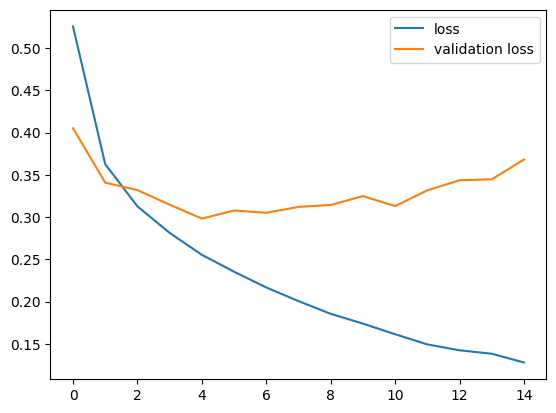

In [ ]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# it looks like the model is overfitting, as validation loss increases

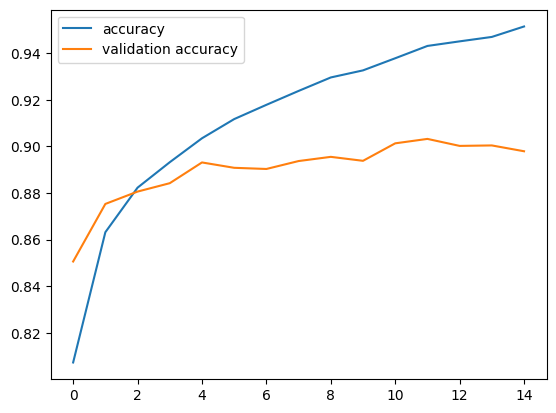

In [ ]:
# next plot accuracy (lower than regular mnist, but this is a harder dataset)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# validation accuracy stays pretty steady, while the validation loss increases
# one explaination is that the model is getting more confident about wrong classifications

313/313 [==============================] - 1s 2ms/step
confusion matrix without normalization
[[853   1  15  20   1   1 103   0   6   0]
 [  3 974   2  12   2   1   3   0   3   0]
 [ 17   1 881  11  26   0  57   0   7   0]
 [ 23   7  20 910  10   0  30   0   0   0]
 [  1   1 110  42 761   0  80   0   5   0]
 [  0   0   0   0   0 974   0  15   0  11]
 [107   0  71  22  69   0 715   0  16   0]
 [  0   0   0   0   0   6   0 970   0  24]
 [  4   0   5   6   3   1   3   1 977   0]
 [  1   0   0   0   0   5   0  30   0 964]]


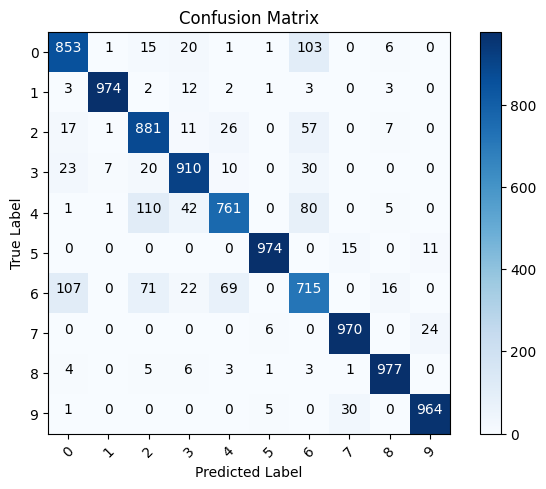

In [ ]:
# plot the confusion matrix 
# this tells us: for each label, how many predictions corresponded to that label
# we want most of the entries to be on the diagonal (i.e. entries = prediction)

# the following function requires sklearn and itertools
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues): 
  """
  This function prints and plots the confusion matrix, 
  normalization can be applied by setting normalize=True.
  """
  if normalize: 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else: 
    print("confusion matrix without normalization")

  print(cm)
    
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
    plt.text(j, i, format(cm[i,j], fmt), 
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black') 

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))    

In [ ]:
# label matching
labels = '''T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

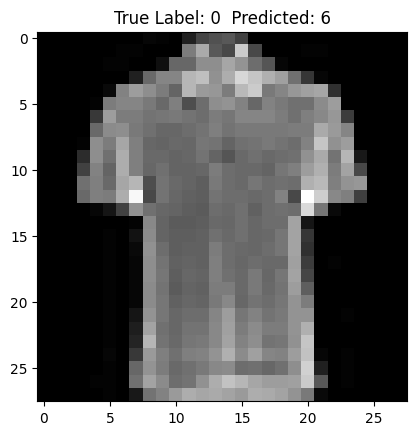

In [ ]:
# plot misclassified examples
# index of misclassified predictions using np.where
# np.where returns two values, but index is first (hence [0])
misclassified_idx = np.where(p_test != y_test)[0]

# select a random index and plot - need to reshape as image was flattened
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True Label: %s  Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))
plt.show()